In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.stats.api import ols

First we have to import the data into a pandas DataFrame

In [15]:
vg = pd.read_csv('vg_data.csv')

We check that the data looks correct by looking at the head

In [4]:
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Then we use .info to take a deeper look into the data and see if there are issues

In [5]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Since the entries are inconsistent, we know there are some issues, so first we drop any values that are filled with 'None' or 'NaN'

In [7]:
games = vg.dropna()

Then check .info again to see if the numbers are at least now consistent

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Now that we have 16,291 entries for each attribute, we can look into the attribute data to see if there are any glaring mistakes

In [9]:
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Since it is currently 2017 and the data set is from 2016, we know that the max of 2020 is an error. It is either due to the name of the game having 2020 or an entry error. We will remove anything that is greater than 2016. 

In [10]:
cleaned_games = games.loc[games['Year'] < 2017, :]

In [11]:
cleaned_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16287 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16287 non-null int64
Name            16287 non-null object
Platform        16287 non-null object
Year            16287 non-null float64
Genre           16287 non-null object
Publisher       16287 non-null object
NA_Sales        16287 non-null float64
EU_Sales        16287 non-null float64
JP_Sales        16287 non-null float64
Other_Sales     16287 non-null float64
Global_Sales    16287 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [12]:
cleaned_games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000
mean,8288.969853,2006.402775,0.265695,0.147768,0.078849,0.048437,0.541022
std,4792.138597,5.830382,0.822525,0.509360,0.311916,0.190105,1.567520
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4131.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8291.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12437.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


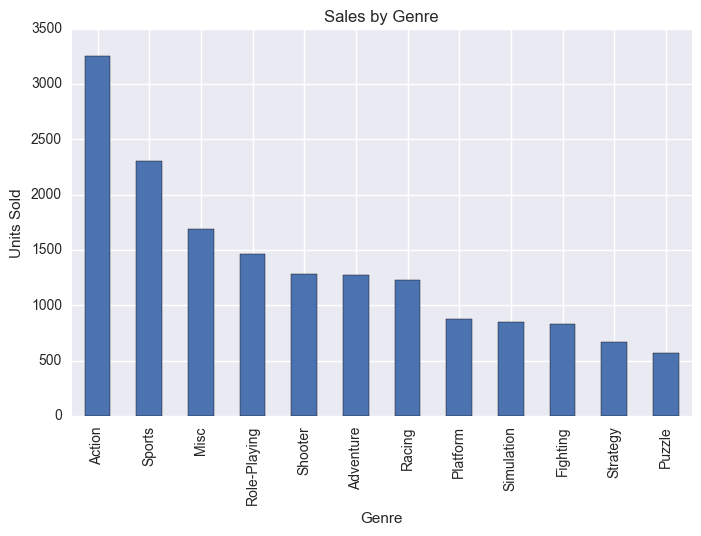

In [16]:
fig,ax = plt.subplots(figsize=(8,5))
cleaned_games['Genre'].value_counts(sort=True).plot(kind='bar')

plt.xlabel('Genre')
plt.ylabel('Units Sold')
plt.title('Sales by Genre')

* Let's look at the correlation between the different variables

* We can ignore rank and year....what is interesting is how Japan sales figures don't
* correlate with European or North American Sales....they are a distinctive market

* Let's make pretty plots.  How many games are there per plaform over the entire period in question?

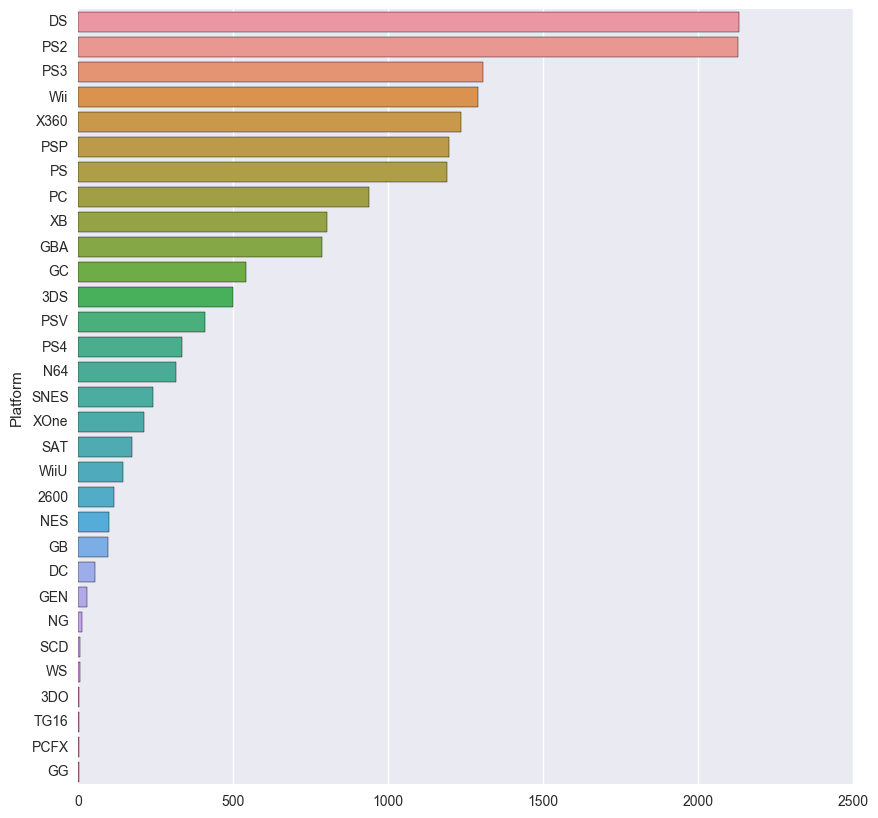

In [29]:
platGenre = pd.crosstab(cleaned_games.Platform,cleaned_games.Genre)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(10,10))
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h')
plt.ylabel = "Platform"
plt.xlabel = "Total games"
plt.show()

*  Heat map for number of games per genre per platform

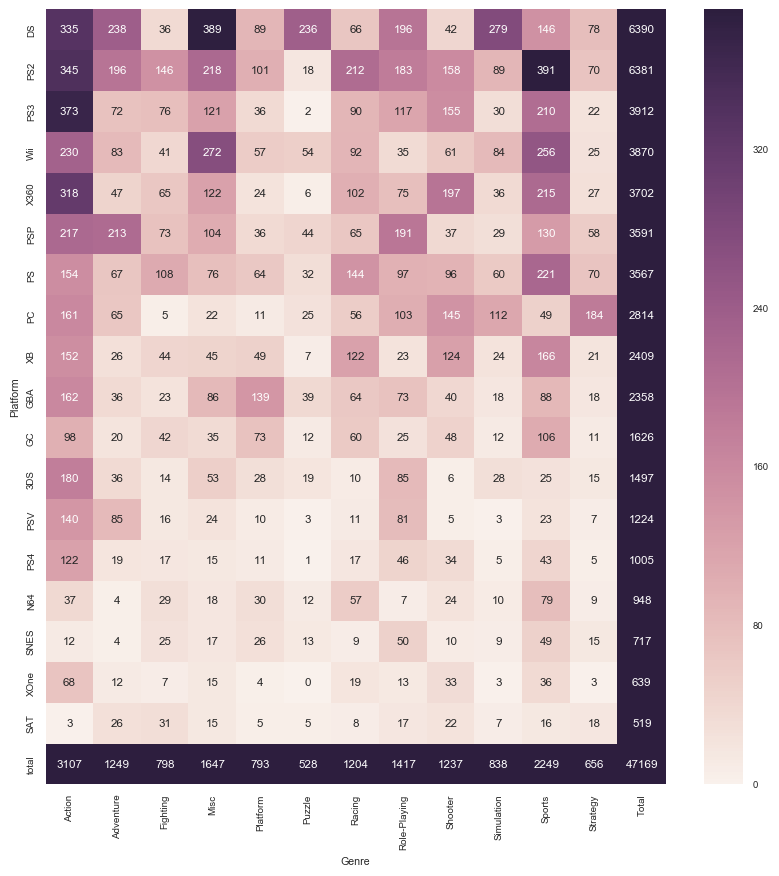

In [32]:
platGenre['Total'] = platGenre.sum(axis=1)
popPlatform = platGenre[platGenre['Total']>500].sort_values(by='Total', ascending = False)
neededdata = popPlatform.loc[:,:'Strategy']
maxi = neededdata.values.max()
mini = neededdata.values.min()
popPlatformfinal = popPlatform.append(pd.DataFrame(popPlatform.sum(), columns=['total']).T, ignore_index=False)
sns.set(font_scale=0.7)
plt.figure(figsize=(10,10))
sns.heatmap(popPlatformfinal, vmin = mini, vmax = maxi, annot=True, fmt="d")
plt.xticks(rotation = 90)
plt.show()

* More verbiage

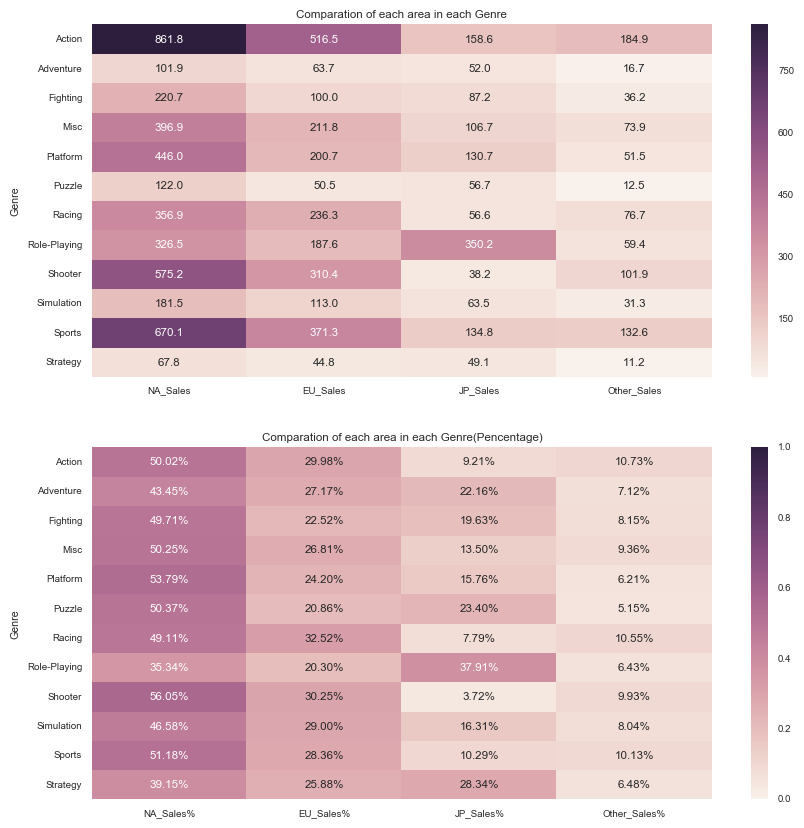

In [34]:
GenreGroup = cleaned_games.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
GenreGroup['NA_Sales%'] = GenreGroup['NA_Sales']/GenreGroup['Global_Sales']
GenreGroup['EU_Sales%'] = GenreGroup['EU_Sales']/GenreGroup['Global_Sales']
GenreGroup['JP_Sales%'] = GenreGroup['JP_Sales']/GenreGroup['Global_Sales']
GenreGroup['Other_Sales%'] = GenreGroup['Other_Sales']/GenreGroup['Global_Sales']
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.7)
plt.subplot(211)
sns.heatmap(GenreGroup.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f')
plt.title("Comparation of each area in each Genre")
plt.subplot(212)
sns.heatmap(GenreGroup.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%')
plt.title("Comparation of each area in each Genre(Pencentage)")
plt.show()

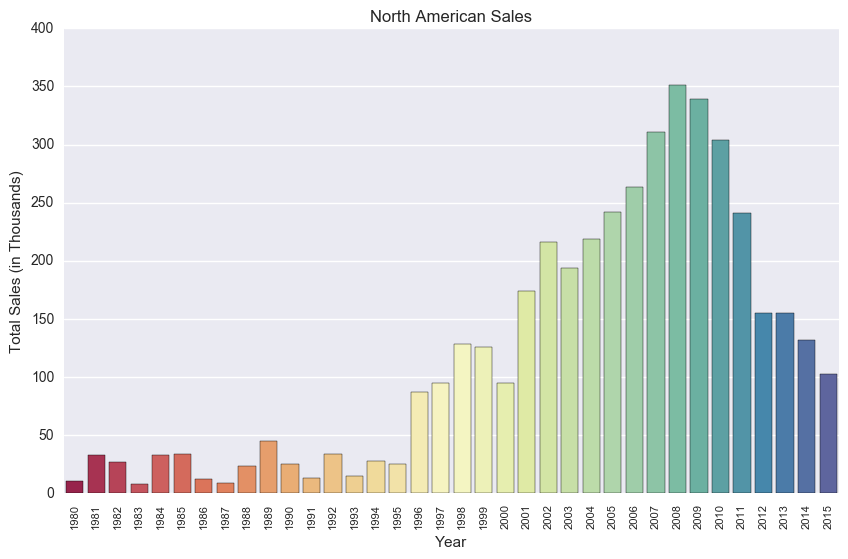

In [25]:
years = range(1980,2016)
sales = []
year_list = []
for year in years:
    sales.append(cleaned_games[cleaned_games['Year'] == year]['NA_Sales'].sum())
    year_list.append(year)

fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(x = year_list,y = sales,ax=ax, palette = 'Spectral')
plt.title('North American Sales')
ticks = plt.setp(ax.get_xticklabels(),fontsize=8,rotation=90)
plt.ylabel('Total Sales (in Thousands)')
plt.xlabel('Year')

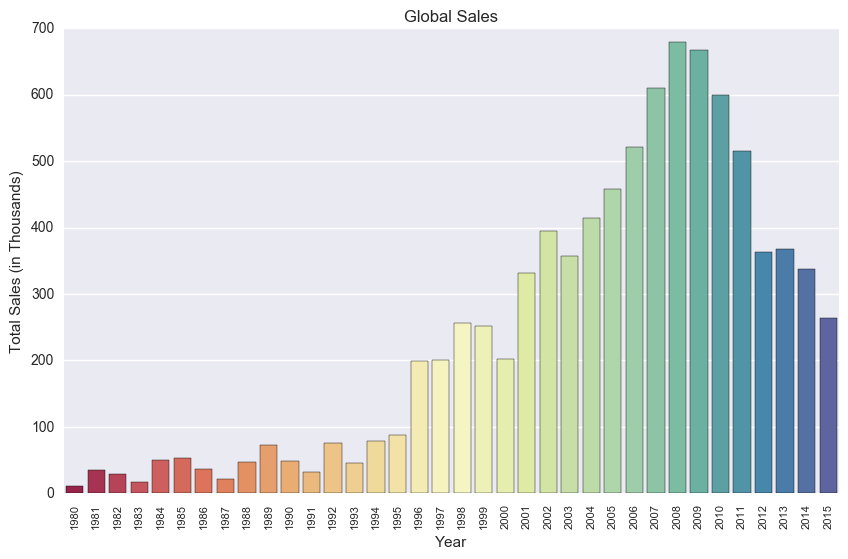

In [26]:
years = range(1980,2016)
sales = []
year_list = []
for year in years:
    sales.append(cleaned_games[cleaned_games['Year'] == year]['Global_Sales'].sum())
    year_list.append(year)

fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(x=year_list,y=sales, palette = 'Spectral')
plt.title('Global Sales')
ticks = plt.setp(ax.get_xticklabels(),fontsize=8,rotation=90)
plt.ylabel('Total Sales (in Thousands)')
plt.xlabel('Year')

Now let's look at the correlation between the variables

In [19]:
cleaned_games.corr(method='pearson') 

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.177705,-0.400319,-0.379155,-0.269336,-0.332746,-0.426987
Year,0.177705,1.000000,-0.091221,0.006250,-0.169365,0.041255,-0.074548
NA_Sales,-0.400319,-0.091221,1.000000,0.768921,0.451279,0.634514,0.941269
EU_Sales,-0.379155,0.006250,0.768921,1.000000,0.436371,0.726252,0.903262
JP_Sales,-0.269336,-0.169365,0.451279,0.436371,1.000000,0.290551,0.612770
Other_Sales,-0.332746,0.041255,0.634514,0.726252,0.290551,1.000000,0.747960
Global_Sales,-0.426987,-0.074548,0.941269,0.903262,0.612770,0.747960,1.000000


In [21]:
ols_cleaned_games = cleaned_games#copies over our original data to a new variable


if 'Genre' in ols_cleaned_games.columns:
    ols_cleaned_games = pd.get_dummies(cleaned_games,columns= ['Genre'], drop_first=True)#creates dummy variables that can be used in later regression

ols_cleaned_games['Global_Sales'] = cleaned_games['Global_Sales']#Add dependent variable 


ols_cleaned_games.head()#check the data

,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,1,Wii Sports,Wii,2006.0,Nintendo,41.49,29.02,3.77,8.46,82.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,Super Mario Bros.,NES,1985.0,Nintendo,29.08,3.58,6.81,0.77,40.24,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Mario Kart Wii,Wii,2008.0,Nintendo,15.85,12.88,3.79,3.31,35.82,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,Wii Sports Resort,Wii,2009.0,Nintendo,15.75,11.01,3.28,2.96,33.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Nintendo,11.27,8.89,10.22,1.00,31.37,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
y_cleaned_games = cleaned_games['Global_Sales']#grabs the dependent var
print(y_cleaned_games.head())#to double check the data

0    82.74
1    40.24
2    35.82
3    33.00
4    31.37
Name: Global_Sales, dtype: float64


In [23]:
games_ols = ols(y=ols_cleaned_games['Global_Sales'], x=ols_cleaned_games[['Genre_Misc', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy']])

games_ols

C:\Users\Shane Hunsberger\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Genre_Misc> + <Genre_Adventure> + <Genre_Fighting>
             + <Genre_Platform> + <Genre_Puzzle> + <Genre_Racing> + <Genre_Role-Playing>
             + <Genre_Shooter> + <Genre_Simulation> + <Genre_Sports> + <Genre_Strategy>
             + <intercept>

Number of Observations:         16287
Number of Degrees of Freedom:   12

R-squared:         0.0121
Adj R-squared:     0.0115

Rmse:              1.5585

F-stat (11, 16275):    18.1778, p-value:     0.0000

Degrees of Freedom: model 11, resid 16275

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
    Genre_Misc    -0.0616     0.0468      -1.32     0.1878    -0.1533     0.0301
Genre_Adventure    -0.3460     0.0515      -6.72     0.0000    -0.4469   